In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('fivethirtyeight')

In [56]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import date

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

#### Get column names and data type for 'Measurement' table

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')

for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


#### Get column names and data type for 'Station' table

In [11]:
inspector = inspect(engine)
columns = inspector.get_columns('station')

for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


### Calculate the date 1 year ago from the last data point in the database

* Find latest_dt
* Find prev_year



In [15]:
lastest_dt = session.query(Measurement.date).order_by(
    Measurement.date.desc()).first()[0]


lastest_dt

'2017-08-23'

In [17]:
prev_year = (dt.datetime.strptime(lastest_dt, '%Y-%m-%d')
             .date() - dt.timedelta(365)
             ).strftime('%Y-%m-%d')

prev_year

'2016-08-23'

### Perform a query to retrieve the data and precipitation scores within date range

* store in variable 'dt_prcp '

In [24]:
dt_prcp = session.query(Measurement.date, Measurement.prcp) .\
    filter(Measurement.date.between(prev_year, lastest_dt)).all()

dt_prcp

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

### Save the query results as a Pandas DataFrame and 

* set the index to the date column
* drop 'none' values using .dropna()
* data is auto sorted by asc order

In [25]:
dt_prcp_df =  pd.DataFrame(dt_prcp, columns=['Date', 'Precipitation'], )
dt_prcp_df.set_index(dt_prcp_df['Date'], inplace=True)
dt_prcp_df = dt_prcp_df .dropna()

dt_prcp_df.tail()

,Date,Precipitation
Date,,
2017-08-17,2017-08-17,0.13
2017-08-19,2017-08-19,0.09
2017-08-21,2017-08-21,0.56
2017-08-22,2017-08-22,0.50
2017-08-23,2017-08-23,0.45


### Use Pandas Plotting with Matplotlib to plot the data


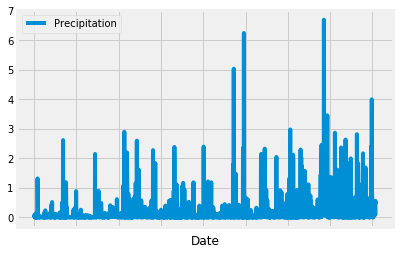

In [130]:
dt_prcp_df.plot()
plt.savefig("Images/Rainfall.png")

### Use Pandas to calcualte the summary statistics for the precipitation data

In [27]:
dt_prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Design a query to show how many stations are available in this dataset.

In [37]:
total_stations = session.query(func.count(distinct(Measurement.station))).all()

total_stations

[(9)]

### Find the most active stations. (i.e. stations have the most rows)
* List the stations and the counts in descending order.

In [40]:
station_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(
    Measurement.station).order_by(func.count(Measurement.station).desc()).all()

station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [44]:
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(
    Measurement.station).order_by(func.count(Measurement.station).desc()).first()[0]

most_active_station

'USC00519281'

### Using the station id from the previous query, calculate the following for most active station:
* lowest temperature recorded 
* highest temperature recorded
* average temperature 


In [52]:
temps_stats = session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs))\
              .filter(Measurement.station == most_active_station)\
              .all()
temps_stats 

[(54.0, 85.0, 71.66378066378067)]

### Using the station with the highest number of temperature observations:
*  Query the last 12 months of temperature observation data for this station 
* Then plot the results as a histogram

### First query data and put data in dataframe to make plotting easier

In [62]:
dt_tobs = session.query(Measurement.tobs) .\
    filter(Measurement.date.between(prev_year, lastest_dt)).\
    filter(Measurement.station == most_active_station).all()

dt_tobs_df = pd.DataFrame(dt_tobs, columns=['Temperatures'])


dt_tobs_df.head()

,Temperatures
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


### Now plot data using histogram

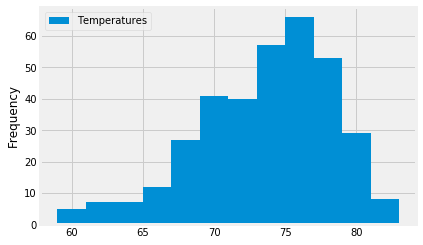

In [135]:
dt_tobs_df.plot.hist(bins=12)
plt.savefig("Images/Temperatures.png")
plt.show()

###  Create a function called `calc_temps`  that will accept start date and end date in the format '%Y-%m-%d' 
### The function will return: the minimum, average, and maximum temperatures for that range

In [64]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.

    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d

    Returns:
        TMIN, TAVE, and TMAX
    """

    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(
            Measurement.date <= end_date).all()


# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


### Using the function `calc_temps` , calculate the tmin, tavg, and tmax for a trip

In [72]:
sprbreak_start_dt = '2017-04-28'
sprbreak_end_dt = '2017-05-05'

tmin,tavg,tmax = calc_temps(sprbreak_start_dt, sprbreak_end_dt)[0]

print(f"Temperature Min:{tmin}")
print(f"Average Temperature:{tavg}")
print(f"Temperature Max:{tmax}")

Temperature Min:58.0
Average Temperature:72.625
Temperature Max:79.0


### Plot the results from your previous query as a bar chart:
* Title: Trip Avg Temp
* y value:The average temperature 
* y error bar (yerr): the peak-to-peak (tmax-tmin)

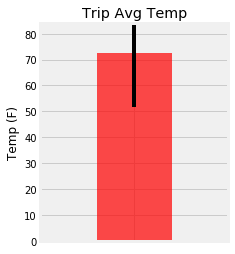

In [134]:
peek_to_peek = tmax-tmin

fig, ax = plt.subplots(figsize=(3, 4))
ax.bar('', tavg, yerr=peek_to_peek, color='r', alpha=0.7)
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.xlim(-1, 1)
plt.ylim(0, tmax+5)
plt.grid(True)
plt.savefig("Images/Rainfall_Avg.png")
plt.show()

### Calculate the rainfall per weather station for  trip dates.
### Sort this in descending order by precipitation amount and list:
* station
* name
* latitude
* longitude
* elevation

In [126]:
rainfall_per_station = session.query(func.sum(Measurement.prcp), Measurement.station, Station.latitude, Station.longitude, Station.elevation)\
    .filter(Measurement.station == Station.station)\
    .filter(Measurement.date.between(sprbreak_start_dt, sprbreak_end_dt))\
    .group_by(Measurement.station)\
    .order_by(func.sum(Measurement.prcp).desc()).all()


rainfall_per_station

[(7.630000000000001, 'USC00519523', 21.33556, -157.71139, 19.5),
 (4.2700000000000005, 'USC00513117', 21.4234, -157.8015, 14.6),
 (2.619999999999999, 'USC00514830', 21.5213, -157.8374, 7.0),
 (2.3199999999999994, 'USC00519281', 21.45167, -157.84888999999998, 32.9),
 (1.9400000000000002, 'USC00516128', 21.3331, -157.8025, 152.4),
 (1.27, 'USC00519397', 21.2716, -157.8168, 3.0),
 (None, 'USC00517948', 21.3934, -157.9751, 11.9)]

In [127]:
rainfall_df = pd.DataFrame(rainfall_per_station, columns=[
                           'Total Rainfall', 'Station Name', 'Station Latitude', 'Station Longitude', 'Station elevation'])

rainfall_df

,Total Rainfall,Station Name,Station Latitude,Station Longitude,Station elevation
0,7.63,USC00519523,21.33556,-157.71139,19.5
1,4.27,USC00513117,21.42340,-157.80150,14.6
2,2.62,USC00514830,21.52130,-157.83740,7.0
3,2.32,USC00519281,21.45167,-157.84889,32.9
4,1.94,USC00516128,21.33310,-157.80250,152.4
5,1.27,USC00519397,21.27160,-157.81680,3.0
6,NaN,USC00517948,21.39340,-157.97510,11.9
